<div align="center" style="color: ORANGE; font-size: 24px; font-weight: bold;">
    DATA PROJECT
</div>
</br>




In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/safety/drug_safety.csv


# 1. Import Packages 📦

In [5]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.1 MB/s eta 0:00:00


In [6]:
# Import required packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Load the dataset
drug_safety = pd.read_csv("/kaggle/input/safety/drug_safety.csv")


In [8]:
# Count the adverse_effects column values for each treatment group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()


In [9]:
# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()


# Perform some Test 

In [10]:
# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]


**Perform Z-Test for Proportions 🔬**

In [11]:
# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Store the p-value
two_sample_p_value = two_sample_results[1]


** Test Independence of Effects and Treatment 🧪**

In [12]:
# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx"
)

# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]
"""
 Perform a chi-squared test to determine if the number of effects (num_effects) is independent of the treatment group (trx).

Finding: Extract and store the p-value to check for independence.

"""

/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


#  Visualize Age Distribution by Treatment Group 📊

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Count'>

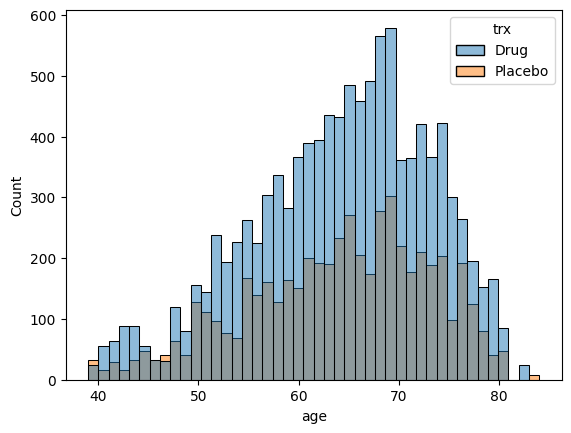

In [13]:
# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")
"""
Create a histogram to visualize the age distribution for each treatment group (Drug and Placebo).
"""

In [14]:
# Optionally - confirm the histogram's output by conducting a normality test
# To choose between unpaired t-test and Wilcoxon-Mann-Whitney test
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05 # 0.05 is also the default
)

"""
Conduct a normality test on the age variable
for both treatment groups. 
This will help decide whether to use a parametric or non-parametric test.
"""

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10727.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5376.
  res = hypotest_fun_out(*samples, **kwds)


## Mann-Whitney U Test for Age ⚖️

In [15]:
# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]


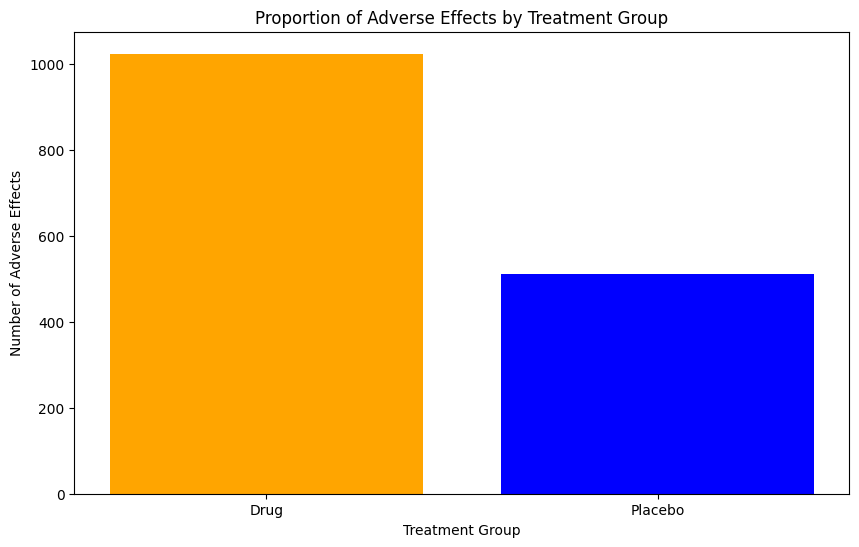

In [16]:
# Create a bar plot to visualize the proportion of adverse effects by treatment group
plt.figure(figsize=(10, 6))
adverse_effects_counts = adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]
labels = ['Drug', 'Placebo']
plt.bar(labels, adverse_effects_counts, color=['orange', 'blue'])
plt.title('Proportion of Adverse Effects by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Number of Adverse Effects')
plt.show()


MWU    0.256963
Name: p-val, dtype: float64